# Traffic Light

https://chartschool.stockcharts.com/table-of-contents/technical-indicators-and-overlays/technical-indicators/traffic-light#adding_the_traffic_light_indicator_to_a_chart

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# yahoo finance is used to fetch data 
import yfinance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-01-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)
df.index = pd.Index(df.index.date, name="Date")

# View Columns
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615894,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608810,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797443,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261940,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108673,82271200


In [3]:
n = 20  # You can adjust this period as needed

# Define upper, middle, and lower levels for the Traffic Light Indicator
upper_level = df['Close'].rolling(window=n).mean() + df['Close'].rolling(window=n).std()
lower_level = df['Close'].rolling(window=n).mean() - df['Close'].rolling(window=n).std()
middle_level = df['Close'].rolling(window=n).mean()

In [4]:
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,42.540001,43.075001,42.314999,43.064999,40.615894,102223600
2018-01-03,43.132500,43.637501,42.990002,43.057499,40.608810,118071600
2018-01-04,43.134998,43.367500,43.020000,43.257500,40.797443,89738400
2018-01-05,43.360001,43.842499,43.262501,43.750000,41.261940,94640000
2018-01-08,43.587502,43.902500,43.482498,43.587502,41.108673,82271200


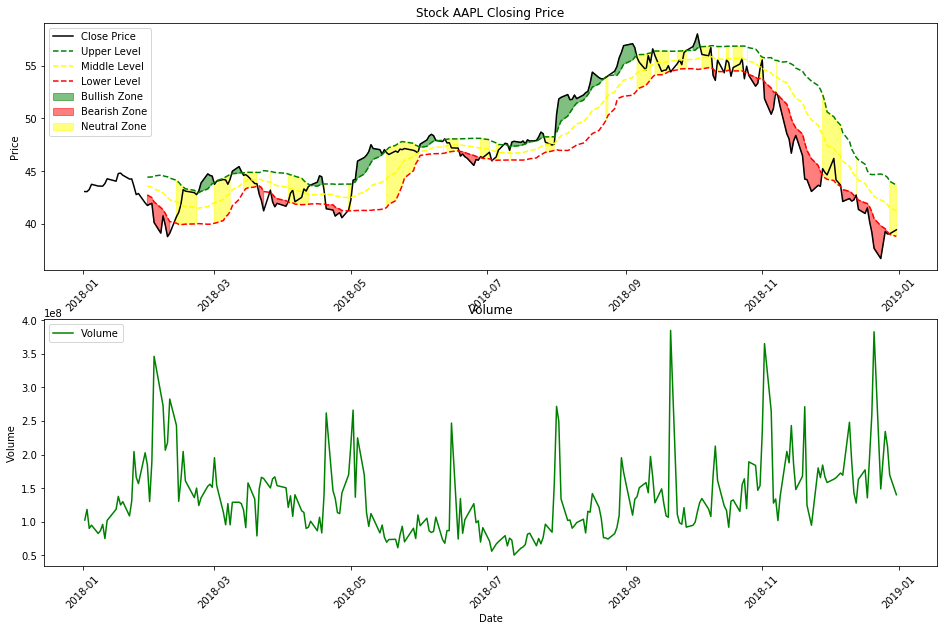

In [5]:
# Create the figure and subplots
fig = plt.figure(figsize=(16, 10))

ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Close'], label='Close Price', color='black')
# Fill areas based on Traffic Light zones
ax1.fill_between(df.index, df['Close'], upper_level, where=(df['Close'] > upper_level), color='green', alpha=0.5, label='Bullish Zone')
ax1.fill_between(df.index, df['Close'], lower_level, where=(df['Close'] < lower_level), color='red', alpha=0.5, label='Bearish Zone')
ax1.fill_between(df.index, upper_level, lower_level, where=((df['Close'] <= upper_level) & (df['Close'] >= lower_level)), color='yellow', alpha=0.5, label='Neutral Zone')

# Plot the levels
ax1.plot(upper_level, label='Upper Level', linestyle='--', color='green')
ax1.plot(middle_level, label='Middle Level', linestyle='--', color='yellow')
ax1.plot(lower_level, label='Lower Level', linestyle='--', color='red')

ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.set_ylabel('Price')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='best')

# Plot the Relative Volume (RVOL)
ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Volume'], label='Volume', color='green')
ax2.set_title('Volume')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='best')

plt.show()

## Candlestick with Taffic Light

In [6]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
#dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = pd.to_datetime(dfc['Date'])
dfc['Date'] = dfc['Date'].apply(mdates.date2num)
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,VolumePositive
0,736696.0,42.540001,43.075001,42.314999,43.064999,40.615894,102223600,False
1,736697.0,43.132500,43.637501,42.990002,43.057499,40.608810,118071600,False
2,736698.0,43.134998,43.367500,43.020000,43.257500,40.797443,89738400,False
3,736699.0,43.360001,43.842499,43.262501,43.750000,41.261940,94640000,False
4,736702.0,43.587502,43.902500,43.482498,43.587502,41.108673,82271200,False


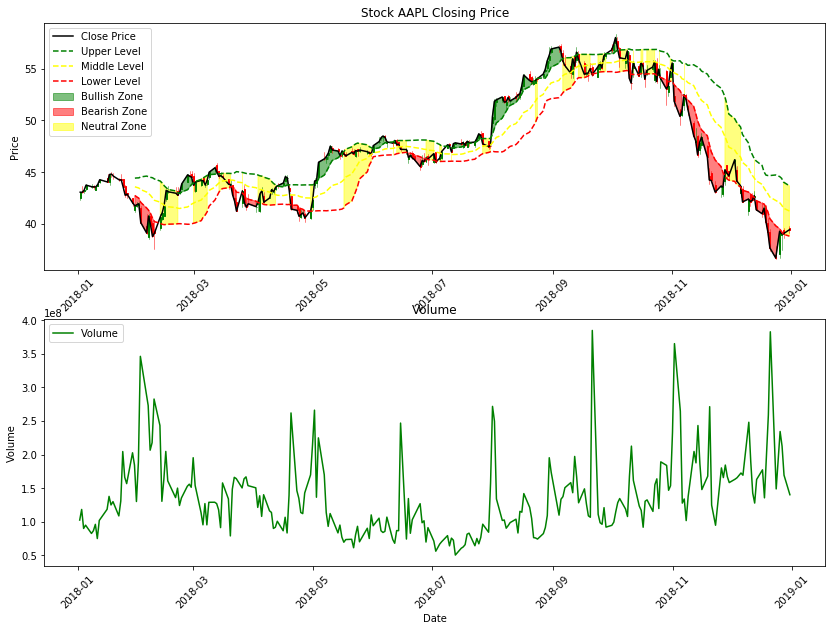

In [7]:
from mplfinance.original_flavor import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.plot(df.index, df['Close'], label='Close Price', color='black')
# Fill areas based on Traffic Light zones
ax1.fill_between(df.index, df['Close'], upper_level, where=(df['Close'] > upper_level), color='green', alpha=0.5, label='Bullish Zone')
ax1.fill_between(df.index, df['Close'], lower_level, where=(df['Close'] < lower_level), color='red', alpha=0.5, label='Bearish Zone')
ax1.fill_between(df.index, upper_level, lower_level, where=((df['Close'] <= upper_level) & (df['Close'] >= lower_level)), color='yellow', alpha=0.5, label='Neutral Zone')

# Plot the levels
ax1.plot(upper_level, label='Upper Level', linestyle='--', color='green')
ax1.plot(middle_level, label='Middle Level', linestyle='--', color='yellow')
ax1.plot(lower_level, label='Lower Level', linestyle='--', color='red')

ax1.set_title('Stock ' + symbol + ' Closing Price')
ax1.set_ylabel('Price')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='best')

# Plot the Relative Volume (RVOL)
ax2 = plt.subplot(2, 1, 2)
ax2.plot(df['Volume'], label='Volume', color='green')
ax2.set_title('Volume')
ax2.set_ylabel('Volume')
ax2.set_xlabel('Date')
ax2.tick_params(axis='x', rotation=45)
ax2.legend(loc='best')

plt.show()